# Импорт библиотек

In [161]:
import math
import wave
import struct
import os
from scipy.io.wavfile import read
from scipy.signal import spectrogram

#  Создание функций генерации звука

In [162]:
def append_voidwave(samples_array,milliseconds,sample_rate = 44100.0):
    """
    Функция принимает исходный массив семплов, длительность композиции в миллисекундах 
    и частоту дескретизаци (семплироавния) 
    Добавляет "беззвучный" семпл в массив семплов
    Ничего не возвращает
    """
    
    number_of_samples = milliseconds * (sample_rate/1000.0)
    
    for x in range(int(number_of_samples)): 
        samples_array.append(0.0)
        
def append_sinewave(samples_array,freq,milliseconds,mul,sample_rate =44100.0):
    """
    Функция принимает на вход исходный массив семплов, частоту, длительность в милисекундах,
    амплитуду и частоту дескретизаци (семплироавния)
    Генерирует синусоидальную волну, добавляет семплы в массив семлов.
    Ничего не возвращает
    """
    
    #Преобразование миллисекунд в количество семплов 
    number_of_samples = (milliseconds * sample_rate ) / 1000.0 
    
    #Синтез звука
    for i in range(int(number_of_samples)):
        samples_array.append(mul*math.sin(2*math.pi*freq*(i/sample_rate )))


def save_wav(file_name,sample_rate =44100.0):
    # Создание wave файла
    wav_file=wave.open(file_name,'w')

    # Параметры wav файла
    nchannels = 1
    sampwidth = 2
    nframes = len(samples_array)
    comptype = 'NONE'
    compname = 'not compressed'
    
    #Установка параметров wav файлу
    wav_file.setparams((nchannels, sampwidth, sample_rate, nframes, comptype, compname))
    
    #Запись семпла в wav файл
    for sample in samples_array:
        wav_file.writeframes(struct.pack('h', int( sample * 32767.0 )))

    wav_file.close()

# Создание музыкального фрагмента с помощью генерации различных синусоид

In [163]:
samples_array = [] #Исходный массивы семвлоп

#Создание музыкального фрагмента с помощью генерации различных синусоид
append_sinewave(samples_array,freq=160.0, milliseconds = 700, mul = 0.3)
append_sinewave(samples_array,freq=160.0, milliseconds = 700, mul = 0.5)
append_sinewave(samples_array,freq=160.0, milliseconds = 700, mul = 0.7)
append_sinewave(samples_array,freq=160.0, milliseconds = 700, mul = 1)

for _ in range(2):
    append_sinewave(samples_array,freq=300.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 100)
    append_sinewave(samples_array,freq=400.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 100)
    append_sinewave(samples_array,freq=500.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 200)


    append_sinewave(samples_array,freq=500.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 100)
    append_sinewave(samples_array,freq=400.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 100)
    append_sinewave(samples_array,freq=300.0, milliseconds = 400, mul= 1)
    append_voidwave(samples_array,milliseconds = 200)
    
    
append_sinewave(samples_array,freq=350.0, milliseconds = 2000, mul= 1)
for _ in range(8):
    append_sinewave(samples_array,freq=500.0, milliseconds = 300, mul= 1)
    append_voidwave(samples_array,milliseconds = 50)
for _ in range(8):
    append_sinewave(samples_array,freq=350.0, milliseconds = 300, mul= 1)
    append_voidwave(samples_array,milliseconds = 50)

#  Работа с внешним wav файлом

In [164]:
samplesSecond = read('samplesSecond.wav', mmap=False) # Считывание массива семплов с файла

In [165]:
#Добавление сэмплов в исходный массив семплов
samplesSecond_new = []
for i in range(samplesSecond[1].shape[0]):
    samples_array.append(samplesSecond[1][i]/32767.0)

In [166]:
save_wav('output.wav') # Сохранение wav файла

# Получение спектрограммы 

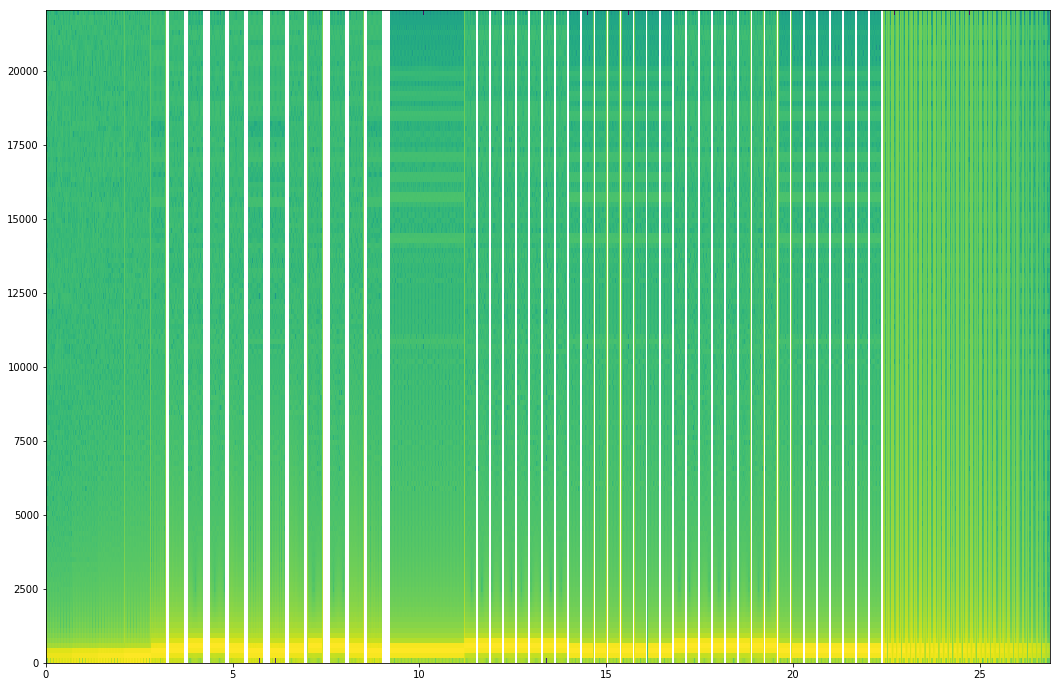

In [167]:
sample_rate, samples = read('output.wav')# получение семплов и частоты дискретизации
pylab.figure(num=None, figsize=(18, 12)) # Создаем фигуру размера 18 на 12
pylab.subplot(111) # добавляем axes на сетку фигуры
pylab.specgram(samples, Fs=sample_rate) # получаем спектрограмму 
pylab.savefig('spectrogram.png') # Сохраняем спектрограмму

In [ ]:
"""
Смотря на спектрограмму можно понять - аудиозапись длится около 30 секунд, ее частоты не превышают 500, смена интенсивности
цвета точек в начале и в конце спектрограммы показывает, что амплитуда мелодии на старте возрвастает, а к оконачнию
убывает.
"""